In [ ]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

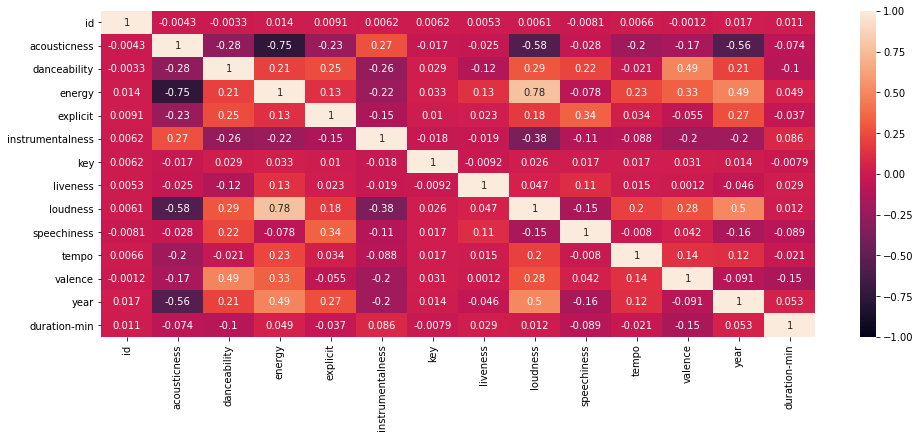

In [ ]:
url = 'https://raw.githubusercontent.com/Open_IIT/main/Train_data.csv'
df = pd.read_csv(url)
df['explicit'] = df.explicit.replace(to_replace=['No', 'Yes'], value=[0, 1])
#df['mode'] = df.mode.replace(to_replace=['Minor', 'Major'], value=[0, 1])
df.head()
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


In [ ]:
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,0,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,0,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


In [ ]:
df['popularity'].unique()

array(['very low', 'low', 'average', 'high', 'very high'], dtype=object)

In [ ]:
df['key'].unique()

array([ 5,  4,  0,  7, 10,  1,  2,  9, 11,  3,  6,  8])

In [ ]:
y = df.popularity
y = pd.DataFrame(y)
df_features= ['mode','explicit','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','year','duration-min']
X = df[df_features]
X.head()

,mode,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,duration-min
0,Major,0,0.949,0.235,0.0276,0.9270,0.513,-27.398,0.0381,110.838,0.0398,1947,3.0
1,Major,0,0.855,0.456,0.4850,0.0884,0.151,-10.046,0.0437,152.066,0.8590,2020,2.4
2,Minor,0,0.827,0.495,0.4990,0.0000,0.401,-8.009,0.0474,108.004,0.7090,1950,2.6
3,Major,0,0.654,0.643,0.4690,0.1080,0.218,-15.917,0.0368,83.636,0.9640,1974,2.4
4,Major,0,0.738,0.705,0.3110,0.0000,0.322,-12.344,0.0488,117.260,0.7850,1973,3.4


In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=0)

In [ ]:
cat_col = ['explicit', 'mode']

from sklearn.preprocessing import LabelEncoder

label_X = X.copy()

label_encoder = LabelEncoder()
for col in cat_col:
    label_X[col] = label_encoder.fit_transform(X[col])


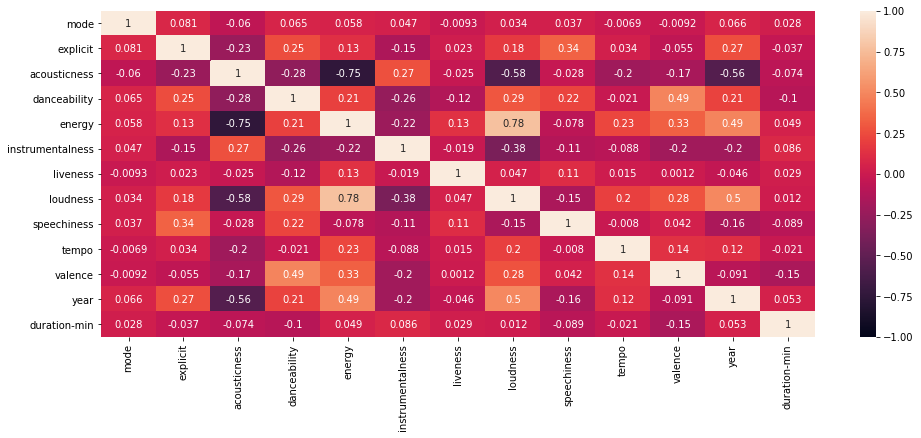

In [ ]:
from sklearn import preprocessing
label_X.head()
#scaler = preprocessing.MinMaxScaler()
#label_X = scaler.fit_transform(label_X)
plt.figure(figsize=(16, 6))
sns.heatmap(label_X.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
from sklearn import preprocessing

Label_encoder = preprocessing.LabelEncoder()

label_y = y.copy()
#label_y = pd.DataFrame(label_y)
#label_y_train.head()
label_y = Label_encoder.fit_transform(y['popularity'])

#y_train = label_y_val
label_y

array([4, 2, 4, ..., 2, 1, 1])

In [ ]:
#from imblearn.over_sampling import SMOTE
#from collections import Counter
#oversample = SMOTE()
#label_X, label_y = oversample.fit_resample(label_X, label_y)


In [ ]:
#from sklearn.preprocessing import StandardScaler
#label_X=StandardScaler().fit_transform(label_X)

In [ ]:
#params={
 #"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 #"max_depth"        : [ 2, 3, 4, 5, 6, 8, 10, 12, 15],
 #"n_estimators"     : [100,200,400,500,600,800],
 #"min_child_weight" : [ 1, 3, 5, 7 ],
 #"gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 #"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(label_X,label_y,random_state=0)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
my_model = XGBClassifier()
my_model.fit(X_train, y_train)
#random_search=RandomizedSearchCV(my_model,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=10,verbose=3)
#random_search.fit(label_X,label_y)
from sklearn.metrics import mean_absolute_error
predictions = my_model.predict(X_val)

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
print(metrics.confusion_matrix(y_val, predictions))
print(metrics.classification_report(y_val, predictions, digits=3))

[[313  85 262   0  31]
 [168 340  96  21  31]
 [137   5 572   3  88]
 [  5  51   3  28   4]
 [ 30  65  64   5 650]]
              precision    recall  f1-score   support

           0      0.479     0.453     0.466       691
           1      0.623     0.518     0.566       656
           2      0.574     0.711     0.635       805
           3      0.491     0.308     0.378        91
           4      0.808     0.799     0.803       814

    accuracy                          0.623      3057
   macro avg      0.595     0.558     0.570      3057
weighted avg      0.623     0.623     0.619      3057



In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(my_model,label_X,label_y,cv=25)
print(score.mean())

0.627545094111264
